In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Proyecto: Red Neuronal implementada con *PyTorch*

## Conjunto de Datos

### Origen y características

El conjunto de datos a analizar se titula "[Heart failure clinical records Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#)" (Conjunto de datos de registros clínicos de insuficiencia cardíaca), el cual se descargó del repositorio para Machine Learning de UC Irvine. El conjunto contiene los registros médicos de 299 pacientes que tuvieron insuficiencia cardíaca, recolectados durante un periodo de tiempo de seguimiento donde a cada paciente se le realizó un perfil de **13 rasgos clínicos**. Los pacientes fueron 105 mujeres y 194 hombres, con edades entre 40 y 95 años.

Los datos fueron recolectados en 2015 por un conjunto de médicos en the Faisalabad Institute of Cardiology y the Allied Hospital in Faisalabad (Punjab, Pakistan). Una descripción más detallada del conjunto de datos se encuentra en la sección Dataset del siguiente artículo: Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020) [Enlace al artículo](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5). En dicho artículo se encuentra la siguiente [tabla](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1): 

| Feature | Explanation | Measurement | Range |
|:-:|:-:|:-:|:-:|
| Age | Age of the patient | Years | [40,..., 95] |
| Anaemia | Decrease of red blood cells or hemoglobin | Boolean | 0, 1 |
| High blood pressure | If a patient has hypertension | Boolean | 0, 1 |
| Creatinine phosphokinase (CPK) | Level of the CPK enzyme in the blood | mcg/L | [23,..., 7861] |
| Diabetes | If the patient has diabetes | Boolean | 0, 1 |
| Ejection fraction | Percentage of blood leaving the heart at each contraction | Percentage | [14,..., 80] |
| Sex | Woman or man | Binary | 0, 1 |
| Platelets | Platelets in the blood | kiloplatelets/mL | [25.01,..., 850.00] |
| Serum creatinine | Level of creatinine in the blood | mg/dL | [0.50,..., 9.40] |
| Serum sodium | Level of sodium in the blood | mEq/L | [114,..., 148] |
| Smoking | If the patient smokes | Boolean | 0, 1 |
| Time | Follow-up period | Days | [4,...,285] |
| **(target) death event** | If the patient died during the follow-up period | Boolean | 0, 1 |

Nótese que los datos aún no están normalizados. 

Finalmente, el problema a resolver será de clasificación en dos clases, pues se determinará el estado final de los pacientes; es decir, si el paciente murió a causa de la enfermedad o sobrevivió. Esto se determinará luego de entrenar una red neuronal con los datos recolectados para los 13 rasgos de cada paciente; luego, se obtendrá un valor entre 0 y 1 que determinará la posibilidad que tiene el paciente de morir.

### Análisis

Como primer paso cargaremos nuestros datos sobre un data frame de `pandas`, entonces importamos `pandas` como nuestro gestor de datos.

In [2]:
import pandas as pd

Cargamos datos (Todos ellos se encuentran dentro de un solo archivo con formato .csv):

In [3]:
features_frame = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

Imprimimos una parte de los datos:

In [4]:
features_frame

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Tenemos 299 filas que corresponden a cada uno de los pacientes y 13 columnas que presentan los rasgos extraídos para cada paciente. 

In [5]:
features_frame.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Nótese que para los casos de valores booleanos (i.e. anaemia, diabetes, etc.), tenemos que el promedio representa el porcentaje de individuos que cumplen con esa característica. De la tabla anterior observamos que 32.107% (96/299) de los pacientes fallecieron. 

In [6]:
features_frame.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

A continuación, presentamos histogramas de los rasgos (Para ello importamos `matplotlib.pyplot`):

In [7]:
import matplotlib.pyplot as plt

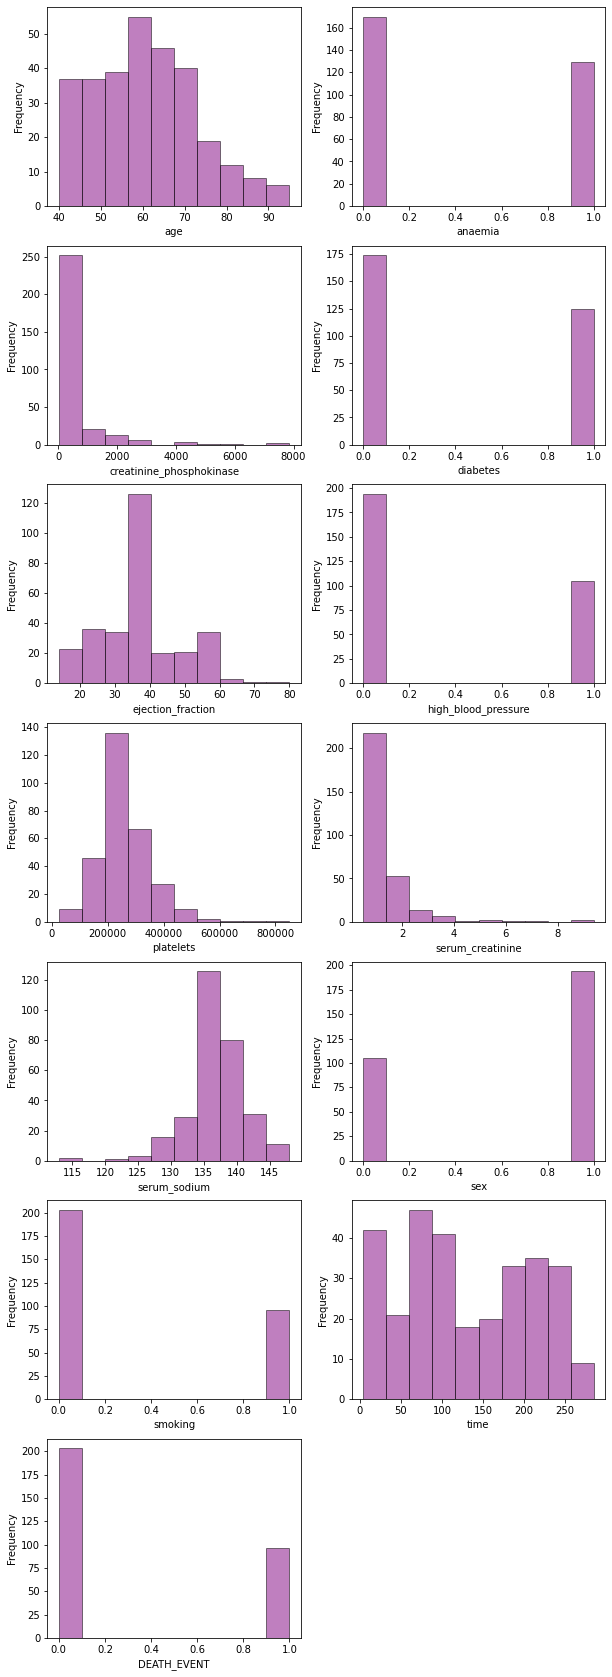

In [8]:
i=1

for col in features_frame.columns:
    plt.subplot(7, 2, i)
    features_frame[col].plot(kind='hist',color='purple',edgecolor='black',figsize=(10,30), alpha = 0.5)
    plt.xlabel(col, size=10)
    i = i+1

### Preparación de los datos

Procedemos a normalizar los datos (excepto la columna DEATH_EVENT, ya que son nuestras etiquetas) usando 

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

donde $x_{norm}$ es el dato normalizado, $x$ corresponde al valor del rasgo, $\bar{x}$ es el promedio de todos los datos correspondientes a un solo rasgo y $\sigma$ a la desviación estándar de ellos.

In [9]:
import numpy as np

In [10]:
features_normalized = pd.DataFrame ()
i=0

# normalización de los rasgos de los pacientes
for col in features_frame.columns:
    st = col
    if st != 'DEATH_EVENT':
        mean_col = np.mean(features_frame[col])
        std_col = np.std(features_frame[col])
        col_normalized = (features_frame[col] - mean_col) / std_col
        features_normalized.insert(i, col+'_normalized', col_normalized)
        i = i + 1
    
features_normalized.insert(12, 'DEATH_EVENT_normalized', features_frame['DEATH_EVENT'])

Presentamos una tabla con los datos normalizados:

In [11]:
features_normalized

,age_normalized,anaemia_normalized,creatinine_phosphokinase_normalized,diabetes_normalized,ejection_fraction_normalized,high_blood_pressure_normalized,platelets_normalized,serum_creatinine_normalized,serum_sodium_normalized,sex_normalized,smoking_normalized,time_normalized,DEATH_EVENT_normalized
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502,1
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691,1
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785,1
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785,1
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451,0
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357,0
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697,0
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509,0


Los siguientes son histogramas de los datos normalizados (Nótese que no se normalizó la columna DEATH_EVENT):

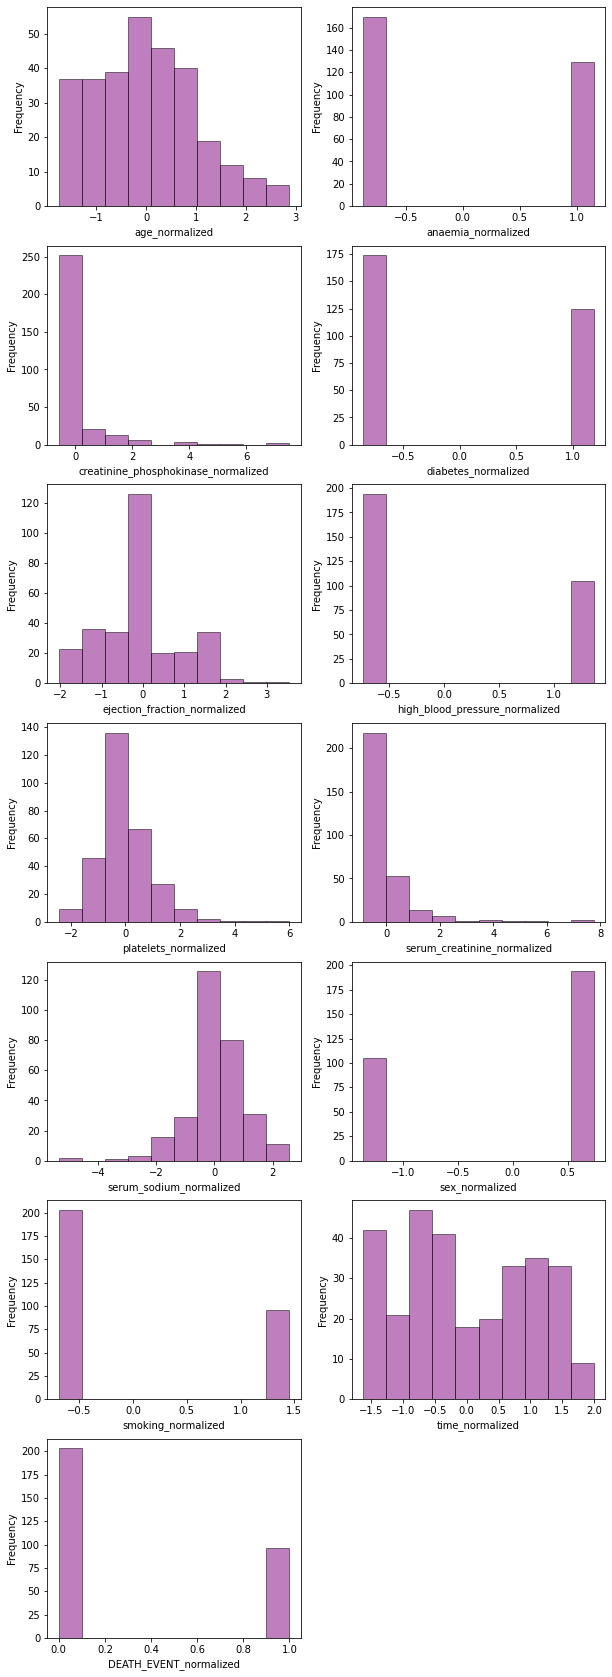

In [12]:
i=1

for col in features_normalized.columns:
    plt.subplot(7, 2, i)
    features_normalized[col].plot(kind='hist',color='purple',edgecolor='black',figsize=(10,30), alpha = 0.5)
    plt.xlabel(col, size=10)
    i = i+1

Luego, extraemos los valores de cada columna del dataframe features_normalized y los colocamos en listas:

In [13]:
age = features_normalized['age_normalized'].values
anaemia = features_normalized['anaemia_normalized'].values
creatinine_phosphokinase = features_normalized['creatinine_phosphokinase_normalized'].values
diabetes = features_normalized['diabetes_normalized'].values
ejection_fraction = features_normalized['ejection_fraction_normalized'].values
high_blood_pressure = features_normalized['high_blood_pressure_normalized'].values
platelets = features_normalized['platelets_normalized'].values
serum_creatinine = features_normalized['serum_creatinine_normalized'].values
serum_sodium = features_normalized['serum_sodium_normalized'].values
sex = features_normalized['sex_normalized'].values
smoking = features_normalized['smoking_normalized'].values
time = features_normalized['time_normalized'].values
DEATH_EVENT = features_normalized['DEATH_EVENT_normalized'].values

Para evitar un sesgo, en caso de que los datos estuvieran ordenados de alguna manera preferencial, primero cambiaremos la posición de ellos de manera aleatoria usando las funciones `shuffle` y `zip`.

In [14]:
from random import shuffle

In [77]:
c = list(zip(age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT)) 
shuffle(c)
(age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT) = zip(*c)

Ahora creamos una lista de listas donde cada elemento de la lista rasgos corresponde a los rasgos normalizados de cada paciente:

In [78]:
rasgos = [[r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12] for r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12 in 
            zip(age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time)]    

Separaremos los datos en conjuntos de entrenamiento, validación y prueba (También separamos etiquetas y rasgos entre sí). Cómo solo tenemos 299 datos, usaremos $\approx$70% para entrenamiento (209), $\approx$20% para validación (60) y $\approx$10% de prueba (30).

In [79]:
train_x = rasgos[0:209]
val_x = rasgos[209:269]
test_x = rasgos[269:299]
train_y = DEATH_EVENT[0:209]
val_y = DEATH_EVENT[209:269]
test_y = DEATH_EVENT[269:299]

Convertimos los datos en tensores torch:

In [80]:
train_x = torch.tensor(train_x, dtype=torch.double)
train_y = torch.tensor(train_y, dtype=torch.double).view(209, 1)

val_x = torch.tensor(val_x, dtype=torch.double)
val_y = torch.tensor(val_y, dtype=torch.double).view(60, 1)

test_x = torch.tensor(test_x, dtype=torch.double)
test_y = torch.tensor(test_y, dtype=torch.double).view(30, 1)

In [81]:
print(train_x.size())
print(train_y.size())
print(val_x.size())
print(val_y.size())
print(test_x.size())
print(test_y.size())

torch.Size([209, 12])
torch.Size([209, 1])
torch.Size([60, 12])
torch.Size([60, 1])
torch.Size([30, 12])
torch.Size([30, 1])


### Definimos la red Neuronal

Usaremos una red completamente conectada con 3 capas y con el siguiente número de nodos en cada una de ellas: 24, 5 y 2.

In [133]:
#Definimos el módulo nn.Module
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # Construimos red neuronal con 3 capas y nodos completamente conectados (Full connected network)
        # Y = WX + b
        self.fc1 = nn.Linear(12,25)  # Definimos capa completamente conectada con 25 nodos.
        self.fc2 = nn.Linear(25,5)  # Definimos capa completamente conectada con 5 nodos.
        self.fc3 = nn.Linear(5,1)  # Definimos capa completamente conectada de salida con 1 nodos.
        
    # Definimos funciones de activación
    def forward(self, x):
        x = x.view(-1,12)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
    # Función para calcular número de rasgos
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=12, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [134]:
params = list(net.parameters())
print(len(params))
print(params[0].size())
print(params[1].size())
print(params[2].size())
print(params[3].size())
print(params[4].size())
print(params[5].size())

6
torch.Size([25, 12])
torch.Size([25])
torch.Size([5, 25])
torch.Size([5])
torch.Size([1, 5])
torch.Size([1])


Ahora, para este caso usaremos Mean Squared Erro como función de pérdida y SGD con momentum para el optimizador.

In [135]:
lr=0.0001
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)  # Elegimos y configuramos optimizador

In [136]:
def lr_up(epoch,lr):
    if epoch%50 == 49:
        lr *= 0.1
    return lr

Usaremos `networkX`para visualizar la estructura de la red. 

In [137]:
import networkx as nx

class Network_graph(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)

Veamos el modelo creado:

It has 3 layers,
with the following number of nodes per layer [25, 5, 1]


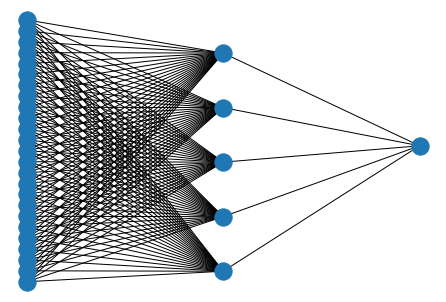

In [138]:
layers = [25,5,1]
net_graph = Network_graph(layers)
net_graph.graph(layers)

### Entrenamos la red neuronal

In [139]:
epochs = 200

# listas para guardar los costos y accuracy durante el entrenamiento:
loss_train_graph = []
loss_val_graph = []
accuracy_train = []
accuracy_val = []

for epoch in range(epochs):  # loop over the dataset multiple times
    
    running_loss_val = 0.0
    running_loss = 0.0
    correct_train = 0
    for i in range(209):
        # zero the parameter gradients
        optimizer.zero_grad()  # Eliminamos gradientes existentes

        # forward + backward + optimize
        outputs = net(train_x[i].float())  # Introducimos datos en la red
        outputs = torch.reshape(outputs, (-1,))
        loss_train = criterion(outputs,train_y[i].float()) # Se calcula función de pérdida
        loss_train.backward()  # Backpropagation 
        optimizer.step()  # Actualizamos pesos
        running_loss += loss_train.item()
        a_train = outputs.detach().numpy()
        if a_train[0] <= 0.500:
            b_train = 0
        else:
            b_train = 1
        c_train = train_y[i].detach().numpy()
        correct_train += (b_train == c_train)
    acc_train = 100 * correct_train / 209
    accuracy_train.append(acc_train)
        
    correct = 0
    with torch.no_grad():  # No necesitamos conocer los gradientes
        for i in range(60):
            outputs_val = net(val_x[i].float())
            outputs_val = torch.reshape(outputs_val, (-1,))
            loss_val = criterion(outputs_val,val_y[i].float())
            running_loss_val += loss_val.item()
            a = outputs_val.detach().numpy()
            if a[0] <= 0.500:
                b = 0
            else:
                b = 1
            c = val_y[i].detach().numpy()
            correct += (b == c)
    acc_val = 100 * correct / 60
    accuracy_val.append(acc_val)
    
    # print statistics
    mean_running_loss = running_loss / 209
    mean_running_loss_val = running_loss_val / 60
    loss_train_graph.append(mean_running_loss)
    loss_val_graph.append(mean_running_loss_val)
    print('Época: %d, loss_train: %.4f' %(epoch + 1, mean_running_loss),' val_train: %.4f' %(mean_running_loss_val))
    print('Train Accuracy: %.3f %%' % (acc_train), ' Val Accuracy: %.3f %%' % (acc_val))
    print('lr',lr)
    running_loss = 0.0
    running_loss_val = 0.0
    
    lr = lr_up(epoch,lr)
        
print('Finished Training')

Época: 1, loss_train: 0.3074  val_train: 0.2865
Train Accuracy: 57.895 %  Val Accuracy: 63.333 %
lr 0.0001
Época: 2, loss_train: 0.2351  val_train: 0.2360
Train Accuracy: 67.464 %  Val Accuracy: 73.333 %
lr 0.0001
Época: 3, loss_train: 0.1996  val_train: 0.2058
Train Accuracy: 69.856 %  Val Accuracy: 76.667 %
lr 0.0001
Época: 4, loss_train: 0.1786  val_train: 0.1852
Train Accuracy: 75.598 %  Val Accuracy: 76.667 %
lr 0.0001
Época: 5, loss_train: 0.1651  val_train: 0.1701
Train Accuracy: 78.947 %  Val Accuracy: 81.667 %
lr 0.0001
Época: 6, loss_train: 0.1561  val_train: 0.1587
Train Accuracy: 80.383 %  Val Accuracy: 85.000 %
lr 0.0001
Época: 7, loss_train: 0.1500  val_train: 0.1499
Train Accuracy: 78.947 %  Val Accuracy: 85.000 %
lr 0.0001
Época: 8, loss_train: 0.1458  val_train: 0.1430
Train Accuracy: 79.904 %  Val Accuracy: 86.667 %
lr 0.0001
Época: 9, loss_train: 0.1428  val_train: 0.1375
Train Accuracy: 80.861 %  Val Accuracy: 86.667 %
lr 0.0001
Época: 10, loss_train: 0.1407  val_tr

Época: 78, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 79, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 80, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 81, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 82, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 83, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 84, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 85, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 86, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1e-05
Época: 87, loss_train: 0.1327  val_tr

Época: 147, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-06
Época: 148, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-06
Época: 149, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-06
Época: 150, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-06
Época: 151, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-07
Época: 152, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-07
Época: 153, loss_train: 0.1327  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-07
Época: 154, loss_train: 0.1326  val_train: 0.1105
Train Accuracy: 82.297 %  Val Accuracy: 93.333 %
lr 1.0000000000000002e-07


Gráfica del costo contra la época para los conjuntos de entrenamiento y de validacion:

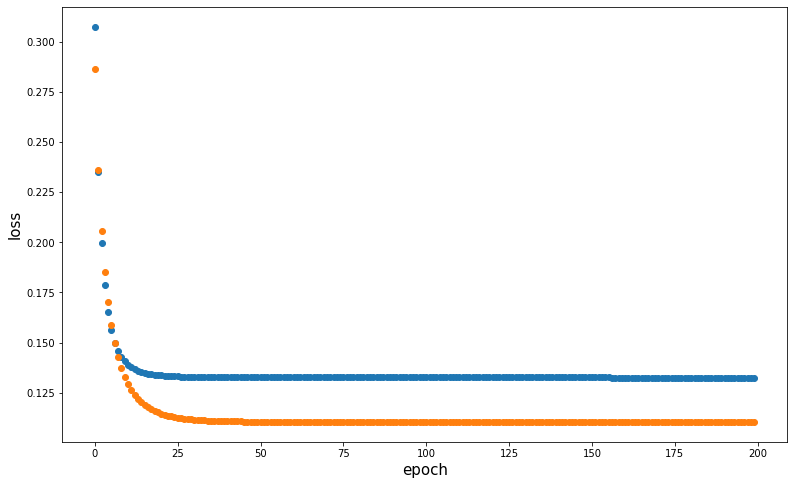

In [140]:
plt.figure(figsize=(13, 8))
plt.scatter(range(epochs), loss_train_graph)
plt.scatter(range(epochs), loss_val_graph)
plt.xlabel('epoch', size=15)
plt.ylabel('loss', size=15);

Gráfica del accuracy contra la época para los conjuntos de entrenamiento y de validación:

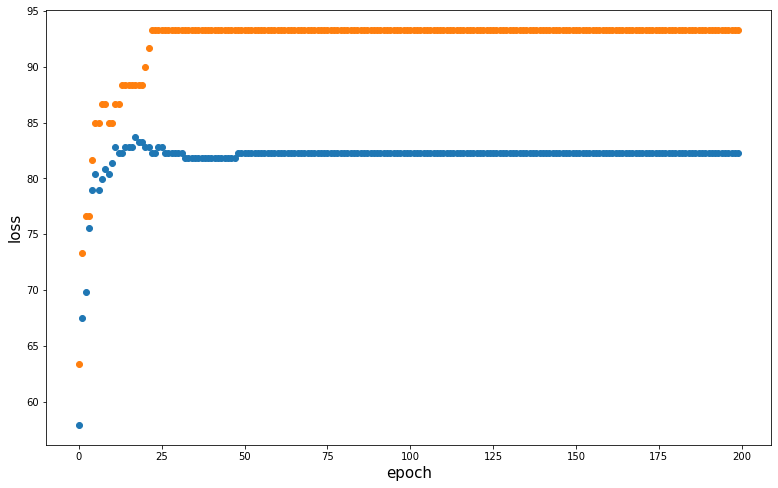

In [141]:
plt.figure(figsize=(13, 8))
plt.scatter(range(epochs), accuracy_train)
plt.scatter(range(epochs), accuracy_val)
plt.xlabel('epoch', size=15)
plt.ylabel('accuracy', size=15);

Guardamos el modelo:

In [142]:
PATH = './heart_failure2.pth'
torch.save(net.state_dict(), PATH)

### Evaluamos la red

Usamos el siguiente código para evaluar el rendimiento de la red sobre el conjunto de prueba (Nótese que estamos tomando valores resultantes de la red mayores a 0.500 como una predicción de muerte, mientras que menores o iguales a 0.500 como predicción de sobrevivir):

In [145]:
correct = 0
total = 0

with torch.no_grad():  # No necesitamos conocer los gradientes
    for i in range(30):
        mol = net(test_x[i].float())
        mol = torch.reshape(mol, (-1,))
        a = mol.detach().numpy()
        if a[0] <= 0.500:
            b = 0
        else:
            b = 1
        total += 1
        c = test_y[i].detach().numpy()
        correct += (b == c)

print('Accuracy of the network on 30 patients: %.3f %%' % (
    100 * correct / total))

Accuracy of the network on 30 patients: 86.667 %


Notemos que se obtuvieron buenos resultados, pues se predice correctamente más del 80% de los casos. Esto es un resultado destacable pues se tuvieron pocos datos para realizar el entrenamiento. 

Vemos también que es apreciable un problema de underfitting. Se modificó la red en diversas ocasiones para dar los mejores resultados; pero se descubrió que lo que tiene más relevancia en el problema presentado, es como se ordenaron los datos durante la mezcla aleatoria que se hizo de ellos. Posiblemente no quedaba una proporción adecuada de vivos y fallecidos en cada unos de los conjuntos y por ello se obtenían resultados muy desiguales cuando se volvía a mezclar el conjunto. Esta situación también se debe a que tenemos muy pocos datos.

La red [24,5,1] fue la que dio los mejores resultados.